# Python 実践データ分析 100本ノック
## 第3部 実践編②：最適化問題
### 第8章 数値シミュレーションで消費者行動を予測する10本ノック

#### ノック71：人間関係のネットワークを可視化してみよう

In [1]:
import pandas as pd

df_links = pd.read_csv("../sample_100knocks/サンプルコード_20200325/8章/links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
links_members = pd.read_csv("../sample_100knocks/サンプルコード_20200325/8章/links_members.csv")
links_members.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
info_members = pd.read_csv("../sample_100knocks/サンプルコード_20200325/8章/info_members.csv")
info_members.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#size = 0.2
#edge_weights = []
#for i in range(len(df_tr)):
#    for j in range(len(df_tr.columns)):
#        edge_weights.append(df_tr.iloc[i][j]*size)

G = nx.Graph()

for i in range(1, len(df_links.index)+1):
    #print(i)
    G.add_node(df_links.columns[i].strip("Node"))

for i in range(len(df_links.index)):
    for j in range(len(df_links.index)):
        if df_links.iloc[i][j] == 1:
            G.add_edge(str(i), str(j))

nx.draw_networkx(G, with_labels=True, font_size=16, node_size=1000, node_color="blue", font_color="white")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

#### ノック72：口コミによる情報伝播の様子を可視化してみよう

In [5]:
# 口コミが伝播するかどうかの確率判定を行う関数
def determine_link(percent):
    judgement_value = np.random.rand()
    #print(judgement_value)
    if (judgement_value <= percent):
        return 1
    else:
        return 0

In [6]:
# ノード毎の口コミの伝播状態を格納する関数
def simulate_percolation(NUM, list_active, percent_percolation):
    for i in range(NUM):
        if (list_active[i] == 1):
            for j in range(NUM):
                if (df_links.iloc[i][j] == 1):
                    if (determine_link(percent_percolation) == 1):
                        list_active[j] = 1
    return list_active                    

In [7]:
def active_node_coloring(list_active):
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i] == 1:
            list_color.append("r")
        else:
            list_color.append("k")
    return list_color

In [8]:
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
percent_percolation = 0.1

list_active[0] = 1

list_timeSeries = []

for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    #print(t, list_active)
    list_timeSeries.append(list_active.copy())

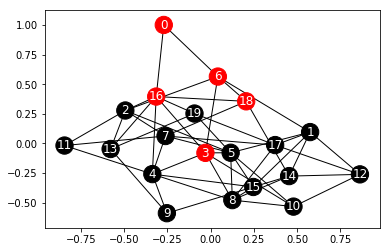

In [9]:
t = 10
nx.draw_networkx(G, font_color = "w", node_color = active_node_coloring(list_timeSeries[t]))
plt.show()

#### ノック73：口コミ数の時系列変化をグラフ化してみよう

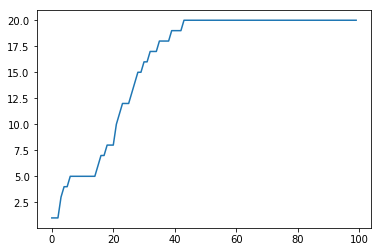

In [10]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

#### ノック74：会員数の時系列変化をシミュレーションしてみよう

In [11]:
# 口コミが伝播するかどうかの確率判定を行う関数
def determine_link(percent):
    judgement_value = np.random.rand()
    #print(judgement_value)
    if (judgement_value <= percent):
        return 1
    else:
        return 0

# 口コミの伝播と消滅をシミュレートする関数
def simulate_percolation(NUM, list_active, percent_percolation, percent_disapparence, df_links):
    # 拡散
    for i in range(NUM):
        if (list_active[i] == 1):
            for j in range(NUM):
                if (df_links.iloc[i][j] == 1):
                    if (determine_link(percent_percolation) == 1):
                        list_active[j] = 1
    #消滅
    for i in range(NUM):
        if (determine_link(percent_disapparence) == 1):
            list_active[i] = 0
    return list_active                    

In [12]:
#メイン関数
#変数定義
percent_percolation = 0.1
percent_disapparence = 0.02
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)

list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    #print(t, list_active)
    list_timeSeries.append(list_active.copy())

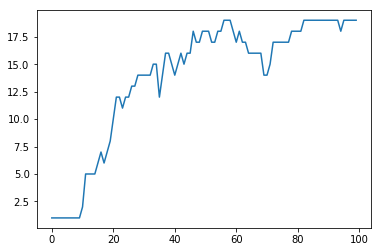

In [13]:
#グラフ描画
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

#### ノック75：パラメータの全体像を、「相図」を見ながら把握しよう

In [14]:
# 口コミが伝播するかどうかの確率判定を行う関数
def determine_link(percent):
    judgement_value = np.random.rand()
    #print(judgement_value)
    if (judgement_value <= percent):
        return 1
    else:
        return 0

# 口コミの伝播と消滅をシミュレートする関数
def simulate_percolation(NUM, list_active, percent_percolation, percent_disapparence, df_links):
    # 拡散
    for i in range(NUM):
        if (list_active[i] == 1):
            for j in range(NUM):
                if (df_links.iloc[i][j] == 1):
                    if (determine_link(percent_percolation) == 1):
                        list_active[j] = 1
    #消滅
    for i in range(NUM):
        if (determine_link(percent_disapparence) == 1):
            list_active[i] = 0
    return list_active                    

In [15]:
#変数定義
percent_percolation = 0
percent_disapparence = 0
T_NUM = 100
NUM = 20

phaseDiagram = np.zeros((NUM, NUM))

#list_timeSeries = []

for i_p in range(NUM):
    for i_d in range(NUM):
        percent_percolation = i_p * 0.05
        percent_disapparence = i_d * 0.05
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_percolation(NUM, list_active, percent_percolation, percent_disapparence, df_links)
            #list_timeSeries.append(list_active.copy())
            phaseDiagram[i_p][i_d] = sum(list_active)

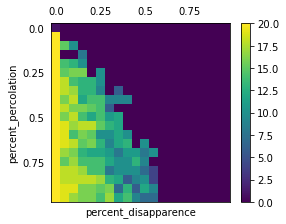

In [16]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel("percent_disapparence")
plt.ylabel("percent_percolation")
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False, left=False, right=False, top=False)
plt.show()

#### ノック76：実データを読み込んでみよう

In [3]:
import pandas as pd

links_members = pd.read_csv("../sample_100knocks/サンプルコード_20200325/8章/links_members.csv")
info_members = pd.read_csv("../sample_100knocks/サンプルコード_20200325/8章/info_members.csv")                         

#### ノック77：リンク数の分布を可視化しよう

In [18]:
links_members.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
info_members.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


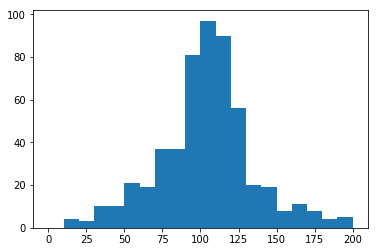

In [29]:
NUM = len(links_members.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(links_members["Node"+str(i)])
plt.hist(array_linkNum, bins=20, range=(0,200))
plt.show()

#### ノック78：シミュレーションのために実データからパラメータを推定しよう

In [4]:
NUM = len(info_members.index)
T_NUM = len(info_members.columns)-1
#消滅の推定確率
count_active = 0
count_active_to_inactive = 0
for t in range(1, T_NUM):
    for i in range(NUM):
        if (info_members.iloc[i][t]==1):
            count_active_to_inactive += 1
            if (info_members.iloc[i][t+1]==0):
                count_active += 1
estimated_percent_disapparence = count_active/count_active_to_inactive

In [5]:
import numpy as np
#拡散の推定確率
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = info_members[info_members[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        df_link_temp = links_members[links_members["Node"+str(df_link_t.index[i])]==1]
        for j in range(len(df_link_temp.index)):
            if (info_members.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[links_members.index[j]]==0):
                    count_link += 1
                if (links_members.iloc[links_members.index[j]][t+1]==1):
                    if(temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]] = 1
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link                  

In [6]:
print(estimated_percent_disapparence)
print(estimated_percent_percolation)

0.10147163541419416
0.020559430579588634
